# Partie 1 : K-mean 


In [1]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt 
from kneed import KneeLocator 
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 
from sklearn.preprocessing import StandardScaler

In [3]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [4]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


In [5]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)


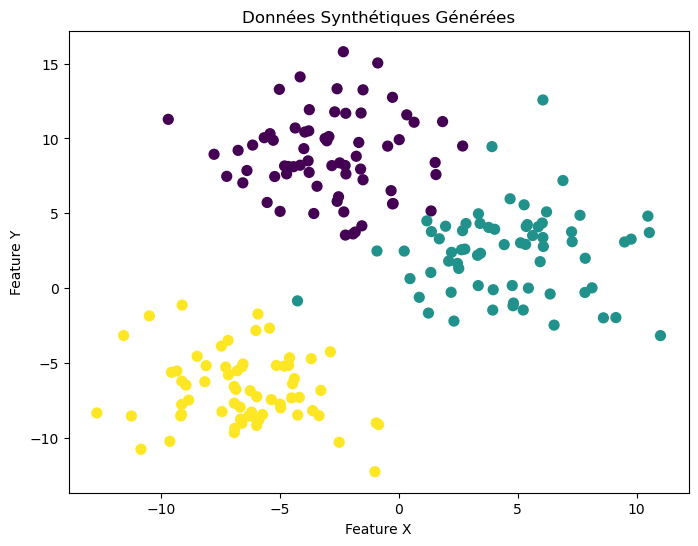

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(features[:, 0], features[:, 1], c=true_labels, s=50, cmap='viridis')
plt.title("Données Synthétiques Générées")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.show()



- Clusters Distincts : Le graphe montre trois ensembles bien séparés de points, chacun dans sa propre couleur, indiquant clairement la présence de trois clusters distincts.

- Cohésion Interne : À l'intérieur de chaque cluster, les points sont proches les uns des autres, montrant une forte cohésion et indiquant que les membres du cluster sont similaires les uns aux autres.

- Séparation Entre les Clusters : Il y a un espace clair entre les groupes de points, ce qui démontre une bonne séparation entre les clusters. Cela suggère que les points de chaque groupe sont bien différenciés des points des autres groupes.

- Implications pour le Clustering : La clarté de la séparation entre les clusters implique que l'algorithme de K-means, si utilisé ici, aurait probablement une performance élevée en termes de précision de l'assignation des points aux clusters appropriés.

- Uniformité des Clusters : Chaque cluster présente une variabilité interne similaire, indiquée par des écarts types comparables, ce qui signifie que les paramètres de génération des données étaient uniformes pour tous les clusters.

In [8]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


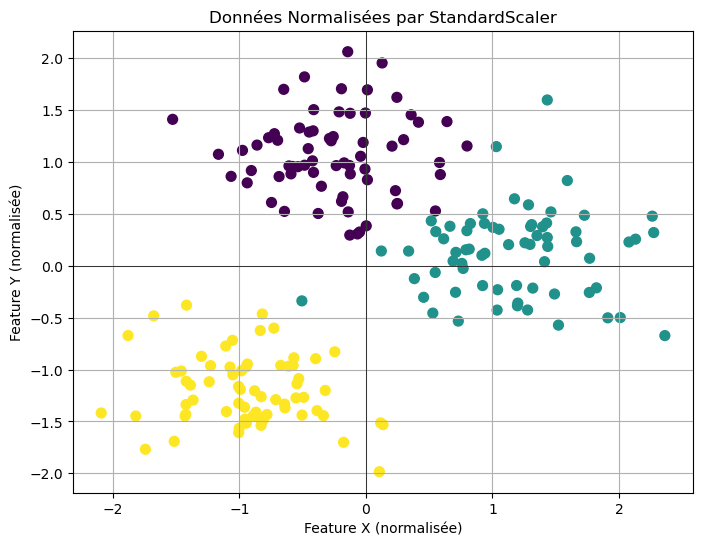

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=true_labels, s=50, cmap='viridis')
plt.title("Données Normalisées par StandardScaler")
plt.xlabel("Feature X (normalisée)")
plt.ylabel("Feature Y (normalisée)")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.show()

- Centrage des Clusters : Les trois clusters sont centrés autour de l'origine (0,0), conformément à l'objectif de StandardScaler de centrer les données.

- Échelle Unifiée : Les axes des caractéristiques sont sur une échelle unifiée, avec des écarts-types normalisés à 1. Cela signifie que les variances des caractéristiques sont maintenant comparables.

- Dispersion des Clusters : La dispersion des clusters le long des axes X et Y est similaire, indiquant que la normalisation a été effectuée de manière cohérente.

- Prêt pour le Clustering : Les données semblent prêtes pour l'application d'algorithmes de clustering comme K-means, qui supposent que les caractéristiques sont sur la même échelle.

In [10]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)
kmeans.fit(scaled_features)


KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [11]:
print("Inertia:", kmeans.inertia_)
print("Cluster Centers:", kmeans.cluster_centers_)
print("Number of Iterations:", kmeans.n_iter_)
print("First 5 Labels:", kmeans.labels_[:5])


Inertia: 74.57960106819856
Cluster Centers: [[ 1.19539276  0.13158148]
 [-0.25813925  1.05589975]
 [-0.91941183 -1.18551732]]
Number of Iterations: 10
First 5 Labels: [0 1 2 2 2]


- Inertia : Une inertie de 74.58 indique un niveau décent de compacité au sein des clusters. Cela signifie que les points de données sont généralement proches de leurs centres de clusters respectifs, ce qui est un signe d'un bon clustering.

- Centres des Clusters :
Le premier cluster est centré autour de (1.195, 0.132), ce qui pourrait indiquer un regroupement de points dans la partie supérieure droite de l'espace des caractéristiques normalisées.
Le deuxième cluster a son centre en (-0.258, 1.056), suggérant un agrégat dans la partie supérieure gauche.
Le troisième cluster, avec un centre à (-0.919, -1.186), se situe probablement dans la partie inférieure gauche.
Efficacité de l'Algorithme : Le fait que KMeans ait convergé en seulement 10 itérations indique que l'algorithme a rapidement trouvé une solution stable et n'a pas dû atteindre la limite des 300 itérations maximales, ce qui est souvent un bon signe d'efficacité.

- Répartition des Clusters : Les étiquettes des cinq premiers points de données montrent une répartition variée parmi les clusters, ce qui peut indiquer que les données présentent une variété naturelle et ne sont pas biaisées vers un seul cluster. 

- Répartition Initiale des Étiquettes : Les cinq premières étiquettes attribuées par KMeans sont [0, 1, 2, 2, 2], indiquant que le premier point de donnée a été assigné au cluster 0, le deuxième au cluster 1, et les troisième, quatrième et cinquième points au cluster 2.

-> Diversité des Assignations : Dès les premières assignations, il y a une représentation de tous les clusters, ce qui suggère que les clusters sont répartis tout au long de l'ensemble de données initial et ne sont pas concentrés dans une région spécifique.

-> Tendance des Étiquettes : La présence de trois étiquettes consécutives du cluster 2 pourrait indiquer que dans cette petite tranche de données, il existe une région où les points sont plus denses ou groupés de manière plus significative en faveur de ce cluster.

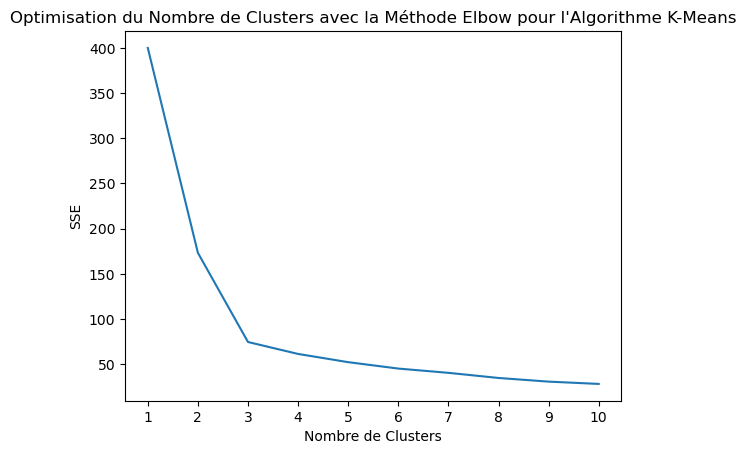

Meilleur k: 3


In [14]:
kmeans_kwargs = { 
 "init": "random", 
 "n_init": 10, 
 "max_iter": 300, 
 "random_state": 42, 
} 
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.title("Optimisation du Nombre de Clusters avec la Méthode Elbow pour l'Algorithme K-Means")
plt.xlabel("Nombre de Clusters")
plt.ylabel("SSE")
plt.show()

kl = KneeLocator(range(1, 11), sse, curve="convex", direction="decreasing")
print("Meilleur k:", kl.elbow)


- Chute Rapide du SSE : On observe une diminution rapide du SSE (Somme des Erreurs au Carré) lorsque le nombre de clusters passe de 1 à 2 et de 2 à 3. Cela indique que l'ajout de ces clusters réduit considérablement l'erreur, améliorant ainsi la qualité du clustering.

- Point d'Inflexion : Après k=3, la ligne devient plus plate, indiquant que l'ajout de clusters supplémentaires n'apporte pas une amélioration significative en termes de diminution du SSE. Cela suggère que les gains marginaux de l'ajout de clusters supplémentaires ne justifient pas la complexité accrue.

- Meilleure Valeur de k : L'outil KneeLocator a identifié k=3 comme étant le "coude" du graphique, ce qui confirme visuellement ce que nous voyons sur le graphique. Cela indique que 3 est le nombre optimal de clusters pour cet ensemble de données selon la méthode Elbow.

-> Choix de k pour K-means : Sur la base de cette analyse, on doit configurer K-means avec n_clusters=3 pour une segmentation optimale de notre ensemble de données.

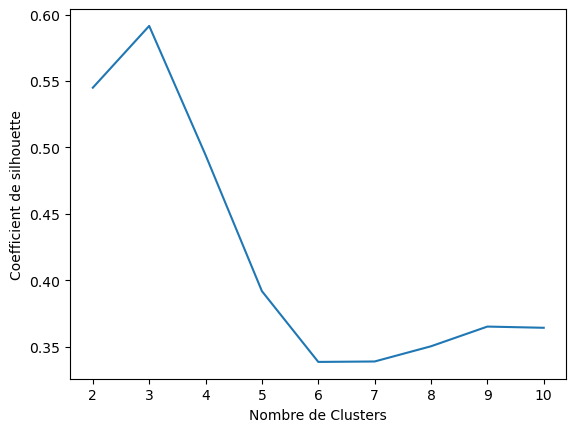

La meilleure valeur de k est 3 avec un coefficient de silhouette de 0.5915043942870359.


In [16]:
silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Nombre de Clusters")
plt.ylabel("Coefficient de silhouette")
plt.show()

best_k = range(2, 11)[silhouette_coefficients.index(max(silhouette_coefficients))]

print(f"La meilleure valeur de k est {best_k} avec un coefficient de silhouette de {max(silhouette_coefficients)}.")

- Pic à k=3 : Le coefficient de silhouette atteint son point le plus élevé lorsque k est égal à 3. Cela suggère que les données sont les plus cohérentes et bien séparées en trois clusters.

- Chute après k=3 : Il y a une chute notable dans la qualité du clustering mesurée par le score de silhouette pour les valeurs de k supérieures à 3. Cela indique que l'ajout de clusters supplémentaires ne fait qu'augmenter la superposition entre les clusters ou les place trop près les uns des autres.

- Stabilité des Scores : Après la chute initiale, le score de silhouette montre une certaine stabilité, bien qu'il reste plus bas que pour k=3. Cela peut indiquer que, bien que les groupes supplémentaires ne soient pas aussi distincts que les trois premiers, ils ne sont pas non plus complètement incohérents.

- Meilleure Valeur de k Confirmée : La meilleure valeur de k est confirmée à être 3 avec un score de silhouette d'environ 0.591. Cela confirme que les données sont optimales avec trois clusters selon la métrique de silhouette, qui évalue à la fois la cohésion interne des clusters et la séparation entre eux.